In [1]:
from Utils import Data_Batch
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
import matplotlib.pyplot as plt

In [2]:
event_df = Data_Batch.readJSON_batch('./cleanData_all_not_drop')

Total:  15  batches
Appending batch  1
Appending batch  2
Appending batch  3
Appending batch  4
Appending batch  5
Appending batch  6
Appending batch  7
Appending batch  8
Appending batch  9
Appending batch  10
Appending batch  11
Appending batch  12
Appending batch  13
Appending batch  14
Appending batch  15


In [8]:
event_df.head()

,belong_cate_lvl1_id,belong_cate_lvl1_name,belong_cate_lvl2_id,belong_cate_lvl2_name,belong_cate_lvl3_id,belong_cate_lvl3_name,href,product_id,time,user_id,cate_lvl3_id_new
0,1108,Đồ điện gia dụng,1115,Thiết bị chiếu sáng,1155,Đèn sạc,https://www.sendo.vn/san-pham/den-bao-cam-tay-...,2501578,2016-04-13 10:38:18,4572B508A026D36F8CA0EAB009B25B3C,110811151155
1,138,Mẹ và bé,1250,Thời trang bé gái,1254,Đầm,https://www.sendo.vn/san-pham/dam-cong-chua-re...,1949753,2016-04-13 10:38:19,BAA9BA982B3B7A1FB8004A46E69D398D,13812501254
2,1019,Đồ dùng trong nhà,1088,Đồ dùng sinh hoạt,1092,Ổ khóa,https://www.sendo.vn/san-pham/khoa-chong-trom-...,2169404,2016-04-13 10:38:19,E172661137805B28F0791EBC1486DF70,101910881092
3,8,Thời trang nữ,9,Áo nữ,10,Áo sơ mi công sở,https://www.sendo.vn/san-pham/ao-voan-co-v-tay...,2777750,2016-04-13 10:38:20,64D8DDD5123724DC0B56B5732B617850,8910
4,1686,Giày dép,1689,Giày nam,1709,"Giày lười, giày mọi nam",https://www.sendo.vn/san-pham/ma-dn3037-giay-n...,2873451,2016-04-13 10:38:21,9625E79DB1155FD6F1A46BE17EACA63A,168616891709


In [9]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104103 entries, 0 to 7104102
Data columns (total 11 columns):
belong_cate_lvl1_id      int64
belong_cate_lvl1_name    object
belong_cate_lvl2_id      int64
belong_cate_lvl2_name    object
belong_cate_lvl3_id      int64
belong_cate_lvl3_name    object
href                     object
product_id               int64
time                     object
user_id                  object
cate_lvl3_id_new         int64
dtypes: int64(5), object(6)
memory usage: 596.2+ MB


In [ ]:
test = Data_Batch.readJSON_batch('./items-batch-update')

In [12]:
test.head()

,belong_cate_lvl1_id,belong_cate_lvl2_id,belong_cate_lvl3_id,href,oldprice,price,product_id,status,uri
0,604,606,624,https://www.sendo.vn/san-pham/dong-ho-xe-dap-d...,NaN,NaN,368202,404.0,None
1,8,664,665,https://www.sendo.vn/san-pham/ao-khoac-blazer-...,200000.0,200000.0,368326,200.0,https://media3.scdn.vn/img/2013/11_11/1_2i4351...
2,220,229,232,https://www.sendo.vn/san-pham/kem-duong-trang-...,NaN,NaN,368552,404.0,None
3,528,530,556,https://www.sendo.vn/san-pham/binh-xit-bui-ban...,NaN,NaN,370328,404.0,None
4,528,529,533,https://www.sendo.vn/san-pham/vien-silicon-cho...,NaN,NaN,370335,404.0,None


In [ ]:
# Visualize data 200-400

## Visualize Product Appearance
- Đồ thị này cho ta thấy phân bố sự xuất hiện của 1 Item
- Đa số Item có 1 tương tác và tập trung trong khoảng 1-4000 tương tác

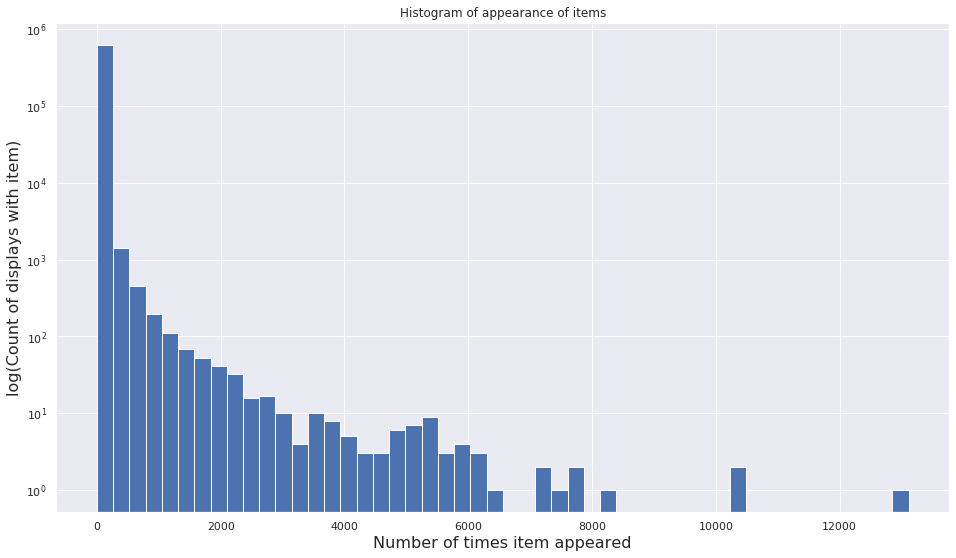

In [14]:
items = event_df.product_id.value_counts()
sns.set()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=50, log=True)
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('log(Count of displays with item)', fontsize=16)
plt.title('Histogram of appearance of items')
plt.show()

## Visualize User Appearance
- Tương tự như trên, ta có biểu đồ về số lần tương tác của người dùng
- Đa phần người dùng có từ 1-500 tương tác, số lần tương tác nhiều nhất khoảng 2000

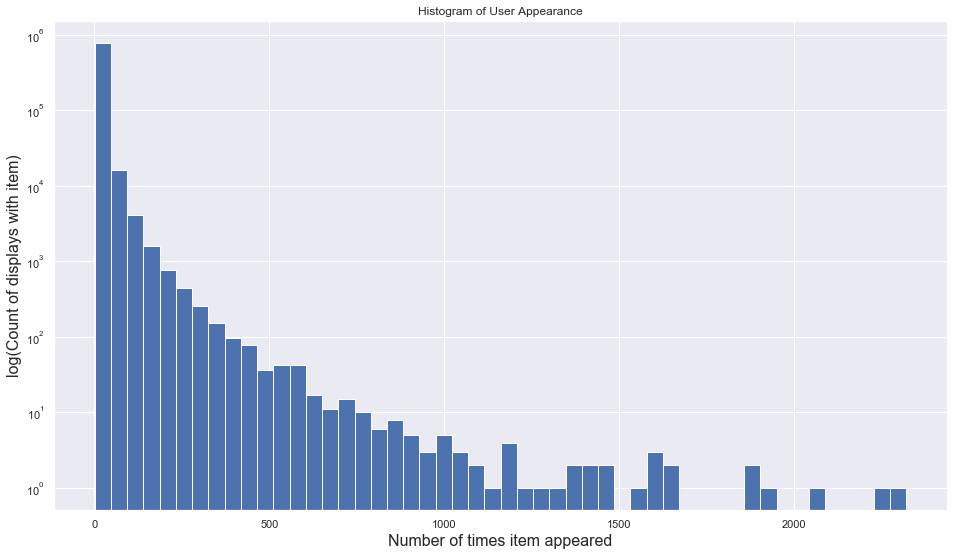

In [20]:
users = event_df.user_id.value_counts()
sns.set()
plt.figure(figsize=(16, 9))
plt.hist(users.values, bins=50, log=True)
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('log(Count of displays with item)', fontsize=16)
plt.title('Histogram of User Appearance')
plt.show()

## Plot Pie Chart of User Interaction

In [4]:
users = event_df.user_id.value_counts().to_frame()

In [5]:
interaction_df = users.reset_index().groupby('user_id').count().reset_index()
interaction_df

,user_id,index
0,1,236462
1,2,119881
2,3,77526
3,4,55553
4,5,42033
...,...,...
617,1902,1
618,1926,1
619,2076,1
620,2265,1


In [6]:
interaction_df['index'].sum()

799484

In [7]:
users[['user_id']].describe()

,user_id
count,799484.000000
mean,8.885860
std,24.077724
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,2323.000000


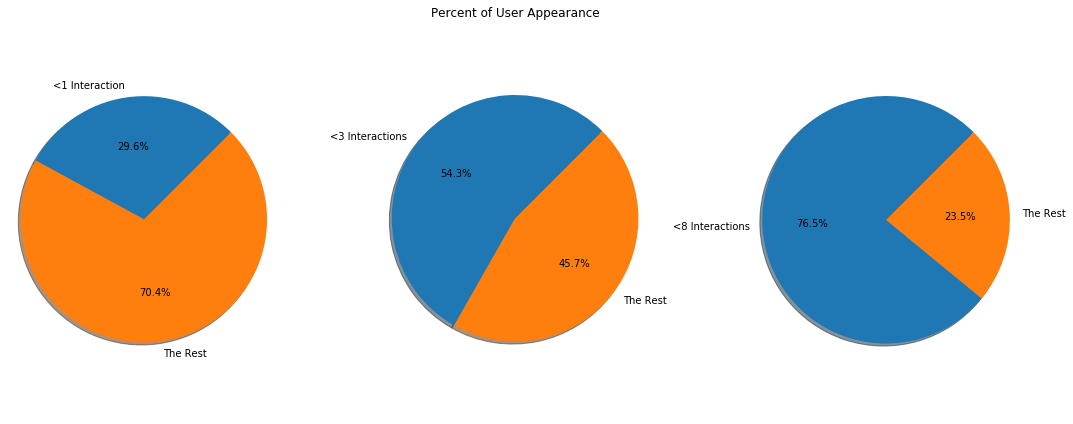

In [10]:
f, ax = plt.subplots(1,3, figsize=(15,6))

# 25%
sum_less = interaction_df[interaction_df['user_id']<2]['index'].sum()
sum_greater = interaction_df['index'].sum() - sum_less

labels = ['<1 Interaction', 'The Rest']
sizes = [sum_less, sum_greater]

ax1 = plt.subplot(131)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')
plt.tight_layout()

# 50%
sum_less = interaction_df[interaction_df['user_id']<4]['index'].sum()
sum_greater = interaction_df['index'].sum() - sum_less

labels = ['<3 Interactions', 'The Rest']
sizes = [sum_less, sum_greater]

ax2 = plt.subplot(132)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax2.axis('equal')
plt.title('Percent of User Appearance')
plt.tight_layout()

# 75%%
sum_less = interaction_df[interaction_df['user_id']<9]['index'].sum()
sum_greater = interaction_df['index'].sum() - sum_less

labels = ['<8 Interactions', 'The Rest']
sizes = [sum_less, sum_greater]

ax3 = plt.subplot(133)
ax3.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45)
ax3.axis('equal')
plt.tight_layout()

In [49]:
day_df = event_df[['user_id','product_id','time']]
day_df

,user_id,product_id,time
0,4572B508A026D36F8CA0EAB009B25B3C,2501578,2016-04-13 10:38:18
1,BAA9BA982B3B7A1FB8004A46E69D398D,1949753,2016-04-13 10:38:19
2,E172661137805B28F0791EBC1486DF70,2169404,2016-04-13 10:38:19
3,64D8DDD5123724DC0B56B5732B617850,2777750,2016-04-13 10:38:20
4,9625E79DB1155FD6F1A46BE17EACA63A,2873451,2016-04-13 10:38:21
...,...,...,...
7104098,0BF4D79FC590FE5ABDE4D34B9EEFB8BC,2867535,2016-04-25 19:55:25
7104099,D535DD7610EB3F299329228A6894738F,1966592,2016-04-25 19:55:25
7104100,536B575B976D3ACDD625B0C6FDF42E4B,2640168,2016-04-25 19:55:26
7104101,9A058DAE8BC87F807C93E18726C330D4,2931885,2016-04-25 19:55:26


In [50]:
day_df['time'] = pd.to_datetime(day_df['time'])

/Users/ted/.virtualenvs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
day_df['month'] = day_df['time'].dt.month
day_df['day'] = day_df['time'].dt.day
day_df['hour'] = day_df['time'].dt.hour
day_df['day_of_week'] = day_df['time'].dt.dayofweek

/Users/ted/.virtualenvs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ted/.virtualenvs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ted/.virtualenvs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [52]:
day_df

,user_id,product_id,time,month,day,hour,day_of_week
0,4572B508A026D36F8CA0EAB009B25B3C,2501578,2016-04-13 10:38:18,4,13,10,2
1,BAA9BA982B3B7A1FB8004A46E69D398D,1949753,2016-04-13 10:38:19,4,13,10,2
2,E172661137805B28F0791EBC1486DF70,2169404,2016-04-13 10:38:19,4,13,10,2
3,64D8DDD5123724DC0B56B5732B617850,2777750,2016-04-13 10:38:20,4,13,10,2
4,9625E79DB1155FD6F1A46BE17EACA63A,2873451,2016-04-13 10:38:21,4,13,10,2
...,...,...,...,...,...,...,...
7104098,0BF4D79FC590FE5ABDE4D34B9EEFB8BC,2867535,2016-04-25 19:55:25,4,25,19,0
7104099,D535DD7610EB3F299329228A6894738F,1966592,2016-04-25 19:55:25,4,25,19,0
7104100,536B575B976D3ACDD625B0C6FDF42E4B,2640168,2016-04-25 19:55:26,4,25,19,0
7104101,9A058DAE8BC87F807C93E18726C330D4,2931885,2016-04-25 19:55:26,4,25,19,0


## Visualize by Hours of day

Text(0.5, 1.0, 'Interaction by hour')

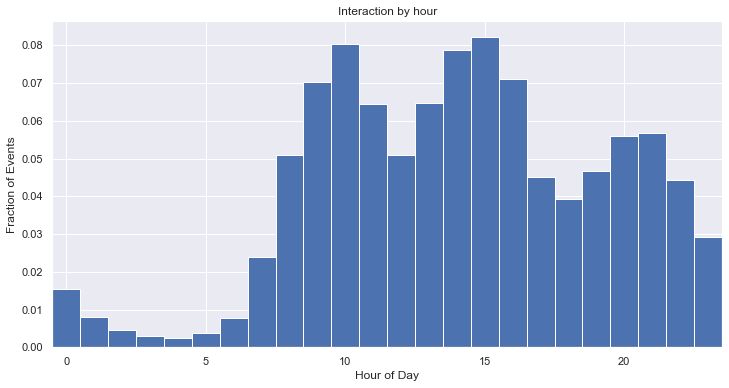

In [53]:
plt.figure(figsize=(12,6))
day_df.hour.hist(bins=np.linspace(-0.5, 23.5, 25), alpha=1, density=True)
plt.xlim(-0.5, 23.5)
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")
plt.title('Interaction by hour')

## Visualize by Day of month

Text(0.5, 1.0, 'Interaction by day in month')

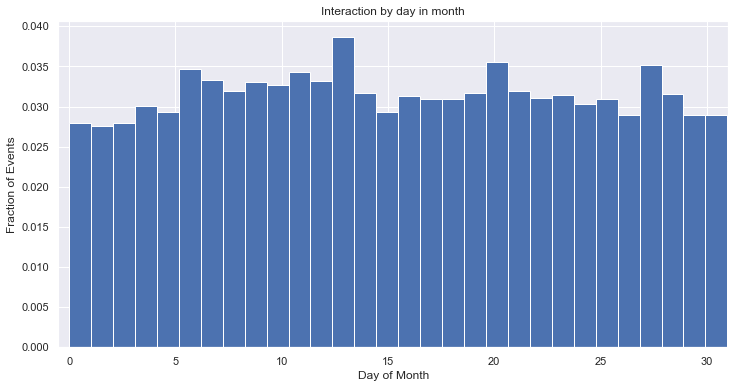

In [31]:
plt.figure(figsize=(12,6))
day_df.day.hist(bins=np.linspace(0, 32, 32), alpha=1, density=True)
plt.xlim(-0.5, 31)
plt.xlabel("Day of Month")
plt.ylabel("Fraction of Events")
plt.title('Interaction by day in month')

## Visualize by Month
- Tháng ba và tháng 7 có 1 ngày nên sự kiện không nhiều như những tháng còn lại

Text(0.5, 1.0, 'Interaction by Month')

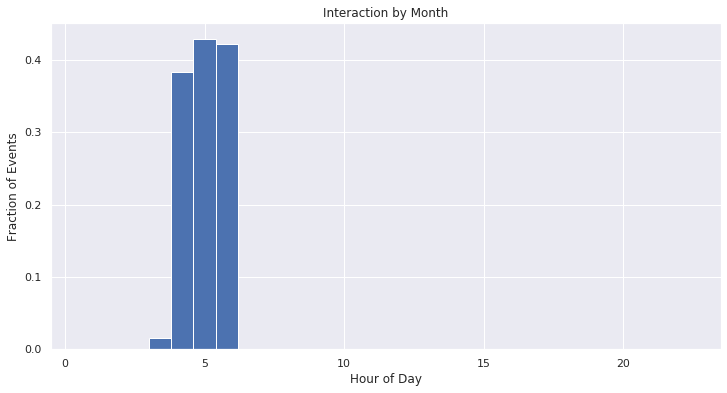

In [130]:
plt.figure(figsize=(12,6))
day_df.month.hist(bins=5, alpha=1, density=True)
plt.xlim(-0.5, 23.5)
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")
plt.title('Interaction by Month')

## Visualize by Days Of Week
- Monday = 0, Sunday = 6
- Bị tụt vào thứ bảy & chủ nhật

Text(0.5, 1.0, 'Interaction by Day of week')

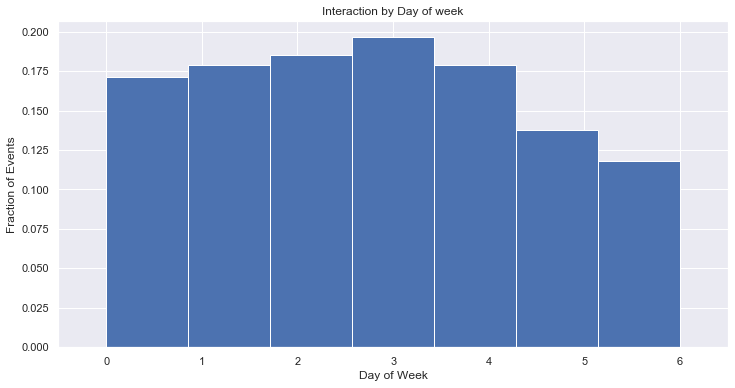

In [23]:
plt.figure(figsize=(12,6))
day_df.day_of_week.hist(bins=7, alpha=1, density=True)
plt.xlim(-0.5, 6.5)
plt.xlabel("Day of Week")
plt.ylabel("Fraction of Events")
plt.title('Interaction by Day of week')

## Visualize by Special Days
- We only have data in 3 months: April, May & June

Text(0.5, 1.0, 'Interaction by day in April')

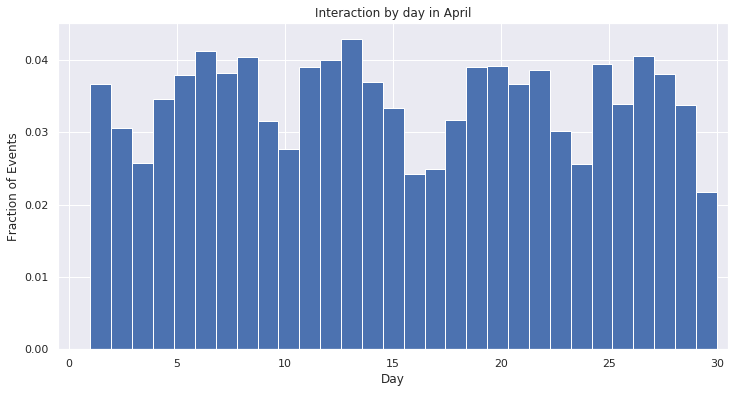

In [153]:
april_df = day_df[day_df['month']==4]
plt.figure(figsize=(12,6))
april_df.day.hist(bins=30, alpha=1, density=True)
plt.xlim(-0.5, 30.5)
plt.xlabel("Day")
plt.ylabel("Fraction of Events")
plt.title('Interaction by day in April')

In [2]:
#
-Thứ 7,CN luôn giảm bất kể tháng nào 
- Thứ 4,5 thường mua nhiều nhất 

SyntaxError: invalid syntax (<ipython-input-2-843496856c41>, line 2)

Text(0.5, 1.0, 'Interaction by day in May')

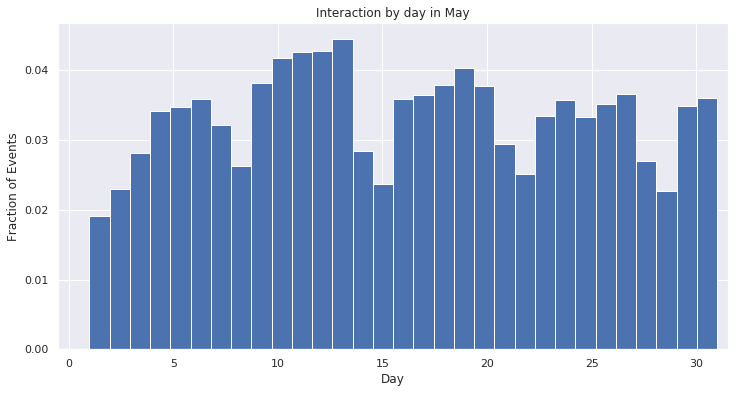

In [152]:
may_df = day_df[day_df['month']==5]
plt.figure(figsize=(12,6))
may_df.day.hist(bins=31, alpha=1, density=True)
plt.xlim(-0.5, 31.5)
plt.xlabel("Day")
plt.ylabel("Fraction of Events")
plt.title('Interaction by day in May')

Text(0.5, 1.0, 'Interaction by day in June')

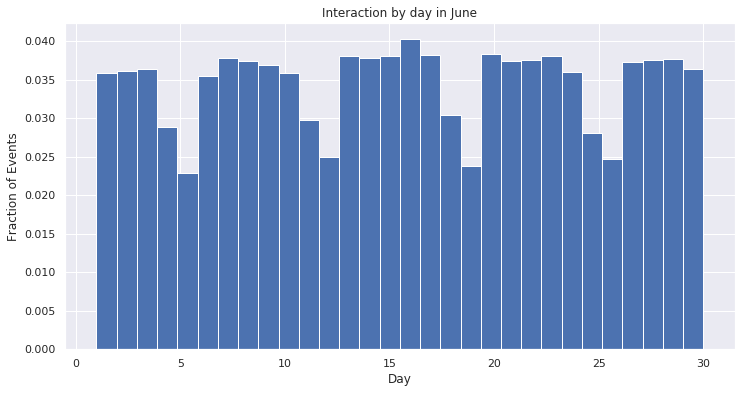

In [151]:
june_df = day_df[day_df['month']==6]
plt.figure(figsize=(12,6))
june_df.day.hist(bins=30, alpha=1, density=True)
plt.xlim(-0.5, 31.5)
plt.xlabel("Day")
plt.ylabel("Fraction of Events")
plt.title('Interaction by day in June')

## Visualize top 5 Cat 1

In [ ]:
at1_df = event_df[['belong_cate_lvl1_id','belong_cate_lvl1_name','time','user_id']]
items = cat1_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()

In [ ]:
# Nữ thường mua nhiều đồ hơn đàn ông - đa số là quần áo 

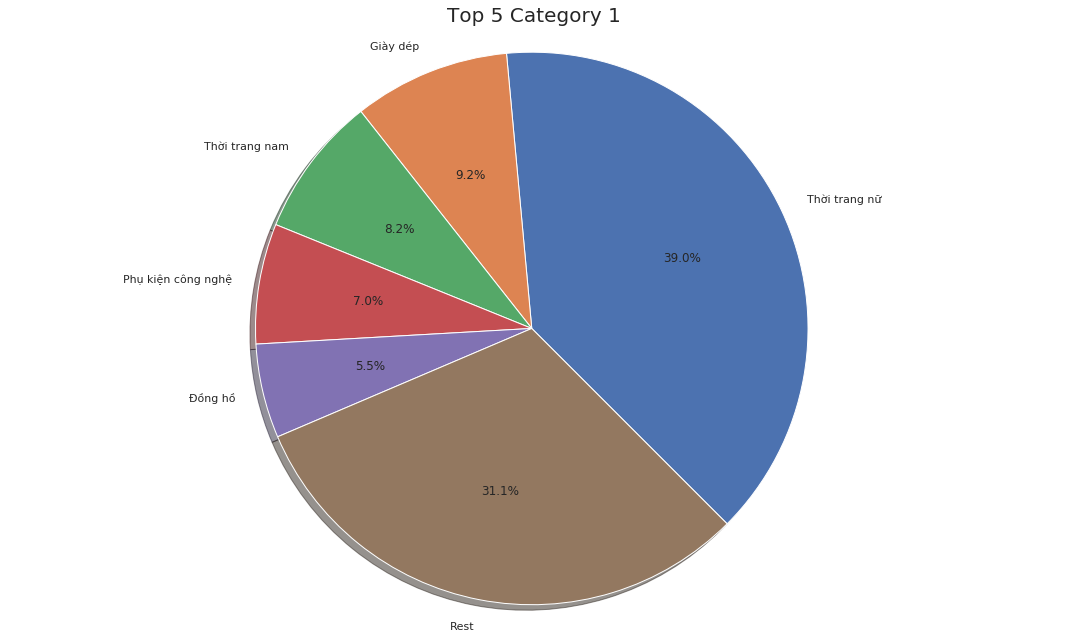

In [206]:
cat1_df = event_df[['belong_cate_lvl1_id','belong_cate_lvl1_name','time','user_id']]
items = cat1_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()

f, ax = plt.subplots(figsize=(15,9))

labels = items[:5]['index'].to_list()
sizes = items[:5]['belong_cate_lvl1_name'].to_list()

labels.append('Rest')
sizes.append(items[5:].belong_cate_lvl1_name.sum())

ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax.axis('equal')  
plt.title('Top 5 Category 1', fontsize=20)
plt.tight_layout()

## Visulize top 10 Cat 2

Text(0.5, 1.0, 'Top 5 Category 2')

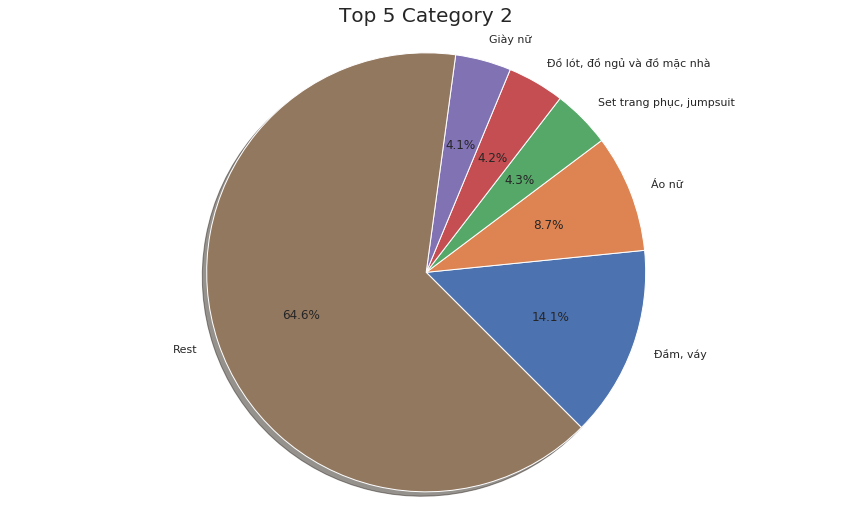

In [210]:
cat2_df = event_df[['belong_cate_lvl2_id','belong_cate_lvl2_name','time','user_id']]
items = cat2_df.belong_cate_lvl2_name.value_counts().to_frame().reset_index()

f, ax = plt.subplots(figsize=(15,9))

labels = items[:5]['index'].to_list()
sizes = items[:5]['belong_cate_lvl2_name'].to_list()

labels.append('Rest')
sizes.append(items[5:].belong_cate_lvl2_name.sum())

ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax.axis('equal')  
plt.title('Top 5 Category 2', fontsize=20)
# plt.tight_layout()

## Histogram of interaction Category level 1

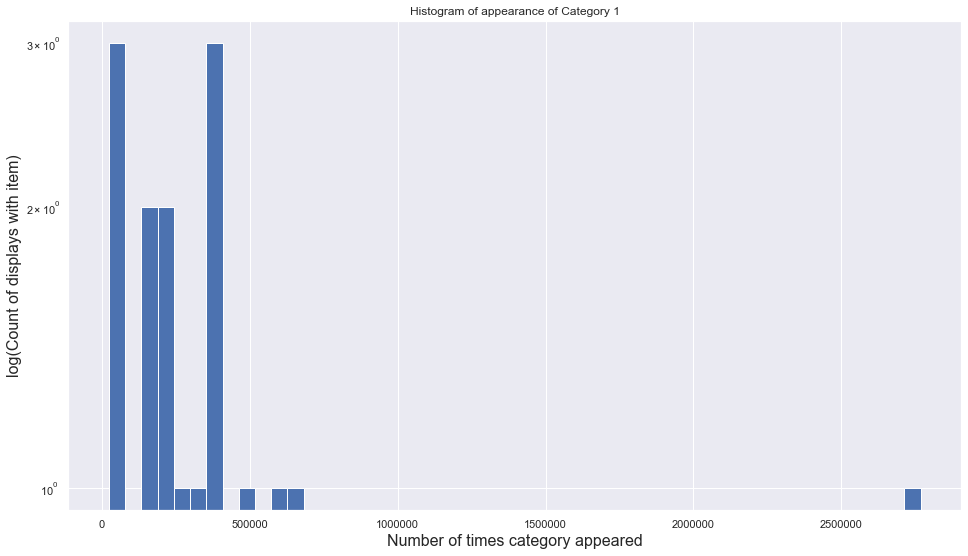

In [55]:
items = event_df.belong_cate_lvl1_id.value_counts()
sns.set()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=50, log=True)
plt.xlabel('Number of times category appeared', fontsize=16)
plt.ylabel('log(Count of displays with item)', fontsize=16)
plt.title('Histogram of appearance of Category 1')
plt.show()

In [56]:
event_df['hour'] = pd.to_datetime(event_df['time']).dt.hour

## Visualize Category interest by time
- The idea is that: Intersting might change in the morning and in the afternoon

In [66]:
event_df['day_of_week'] = pd.to_datetime(event_df['time']).dt.dayofweek

In [67]:
event_df['day_of_week'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [68]:
all_hours = list(np.arange(0,24))
morning_hours = list(np.arange(6,13))
evening_hours = list(np.arange(13,18))
night_hours = [i for i in all_hours if i not in morning_hours and i not in evening_hours]

weekend = list(np.arange(5,7))
normal = list(np.arange(0,5))


In [46]:
night_hours

[0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23]

In [47]:
morning_hours

[6, 7, 8, 9, 10, 11, 12]

In [69]:
weekend

[5, 6]

In [70]:
normal

[0, 1, 2, 3, 4]

Text(0.5, 1.0, 'Top 5 Category 1 in the normal day')

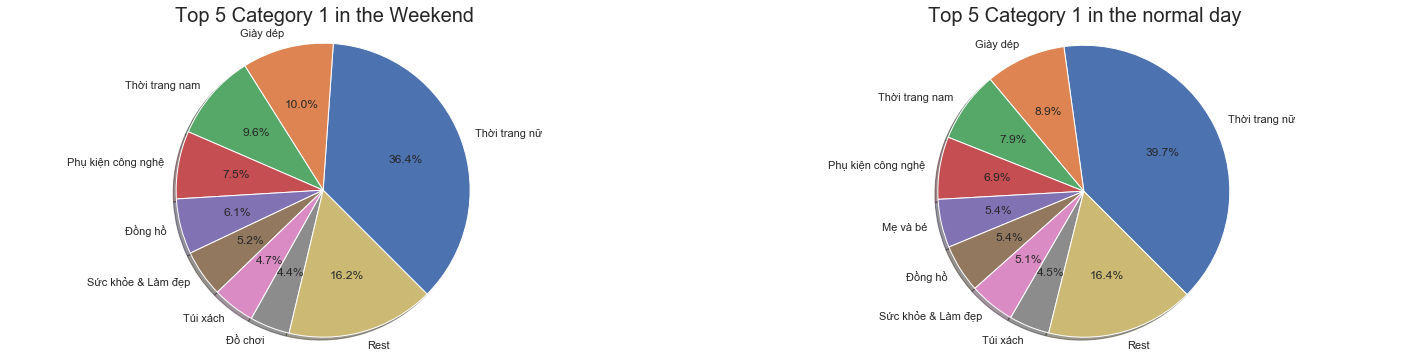

In [72]:
days_df = event_df[['belong_cate_lvl1_id','belong_cate_lvl1_name','day_of_week']]
weekend_df = days_df[days_df['day_of_week'].isin(weekend)]
normal_day_df = days_df[days_df['day_of_week'].isin(normal)]

f, ax = plt.subplots(1,2, figsize=(25,6))

items_weekend = weekend_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()
items_normal= normal_day_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()

# Weekend
labels = []
sizes = []
labels = items_weekend[:8]['index'].to_list()
sizes = items_weekend[:8]['belong_cate_lvl1_name'].to_list()
labels.append('Rest')
sizes.append(items_weekend[8:].belong_cate_lvl1_name.sum())

ax1 = plt.subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 1 in the Weekend', fontsize=20)
# plt.tight_layout()

# Normal Day
labels = []
sizes = []
labels = items_normal[:8]['index'].to_list()
sizes = items_normal[:8]['belong_cate_lvl1_name'].to_list()
labels.append('Rest')
sizes.append(items_normal[8:].belong_cate_lvl1_name.sum())

ax1 = plt.subplot(122)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 1 in the normal day', fontsize=20)
# plt.tight_layout()


Text(0.5, 1.0, 'Top 5 Category 2 in the normal day')

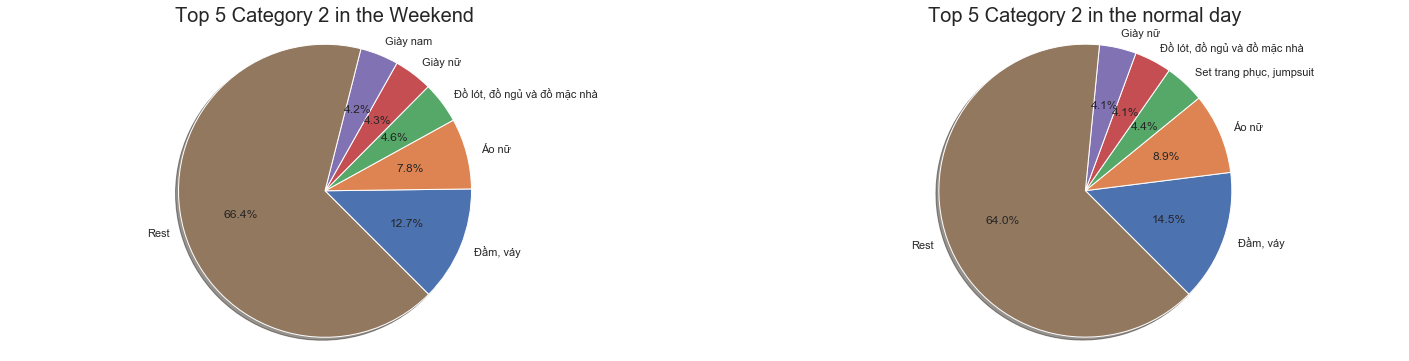

In [74]:
days_df = event_df[['belong_cate_lvl2_id','belong_cate_lvl2_name','day_of_week']]
weekend_df = days_df[days_df['day_of_week'].isin(weekend)]
normal_day_df = days_df[days_df['day_of_week'].isin(normal)]

f, ax = plt.subplots(1,2, figsize=(25,6))

items_weekend = weekend_df.belong_cate_lvl2_name.value_counts().to_frame().reset_index()
items_normal= normal_day_df.belong_cate_lvl2_name.value_counts().to_frame().reset_index()

# Weekend
labels = []
sizes = []
labels = items_weekend[:5]['index'].to_list()
sizes = items_weekend[:5]['belong_cate_lvl2_name'].to_list()
labels.append('Rest')
sizes.append(items_weekend[5:].belong_cate_lvl2_name.sum())

ax1 = plt.subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 2 in the Weekend', fontsize=20)
# plt.tight_layout()

# Normal Day
labels = []
sizes = []
labels = items_normal[:5]['index'].to_list()
sizes = items_normal[:5]['belong_cate_lvl2_name'].to_list()
labels.append('Rest')
sizes.append(items_normal[5:].belong_cate_lvl2_name.sum())

ax1 = plt.subplot(122)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 2 in the normal day', fontsize=20)
# plt.tight_layout()


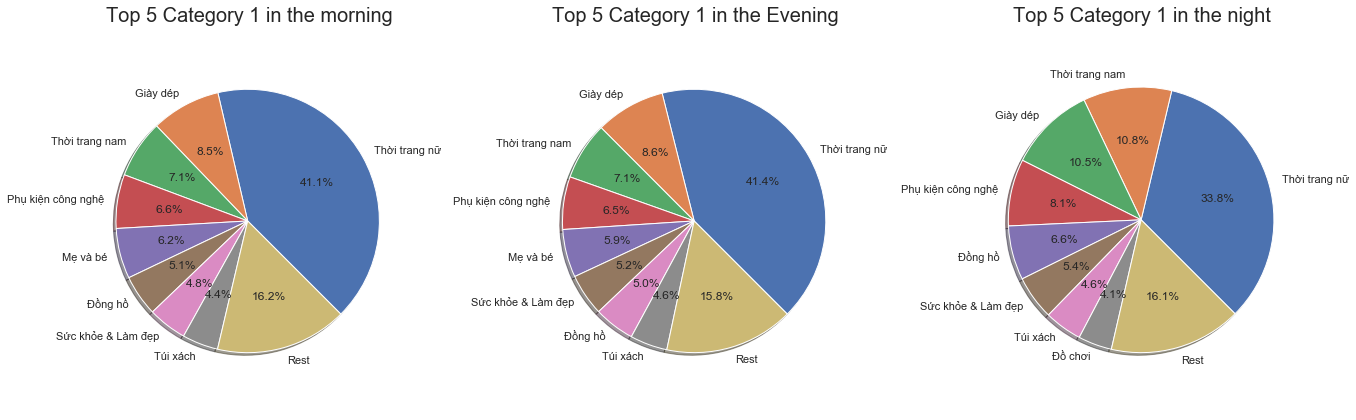

In [65]:
hours_df = event_df[['belong_cate_lvl1_id','belong_cate_lvl1_name','hour']]
morning_df = hours_df[hours_df['hour'].isin(morning_hours)]
evening_df = hours_df[hours_df['hour'].isin(evening_hours)]
night_df = hours_df[hours_df['hour'].isin(night_hours)]

f, ax = plt.subplots(1,3, figsize=(19,6))

items_morning = morning_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()
items_evening = evening_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()
items_night = night_df.belong_cate_lvl1_name.value_counts().to_frame().reset_index()

# Morning
labels = []
sizes = []
labels = items_morning[:8]['index'].to_list()
sizes = items_morning[:8]['belong_cate_lvl1_name'].to_list()
labels.append('Rest')
sizes.append(items_morning[8:].belong_cate_lvl1_name.sum())

ax1 = plt.subplot(131)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 1 in the morning', fontsize=20)
# plt.tight_layout()

# Evening
labels = []
sizes = []
labels = items_evening[:8]['index'].to_list()
sizes = items_evening[:8]['belong_cate_lvl1_name'].to_list()
labels.append('Rest')
sizes.append(items_evening[8:].belong_cate_lvl1_name.sum())

ax1 = plt.subplot(132)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax1.axis('equal')  
plt.title('Top 5 Category 1 in the Evening', fontsize=20)
# plt.tight_layout()


# Night
labels = []
sizes = []
labels = items_night[:8]['index'].to_list()
sizes = items_night[:8]['belong_cate_lvl1_name'].to_list()
labels.append('Rest')
sizes.append(items_night[8:].belong_cate_lvl1_name.sum())

ax2 = plt.subplot(133)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-45)
ax2.axis('equal')  
plt.title('Top 5 Category 1 in the night', fontsize=20)
plt.tight_layout()

- There some different in behaviour at morning and at night
- At night, people tend to care more about giày dép, phụ kiện công nghệ, thời trang nam
- Thời trang nữ giảm 18% vào buổi tối
- Thời trang nam tăng 27% vào buổi tối

In [289]:
(10.8-8.5)/8.5

0.27058823529411774

## Visualize relationship between `value count` and `price`

In [292]:
product_df = pd.read_json('./database/rename_database_5/product.json')

In [294]:
product_df[product_df['price']!=product_df['oldprice']].dropna()

,oldprice,price,product_id,product_name,status,uri,value_count


So sad :( No discount

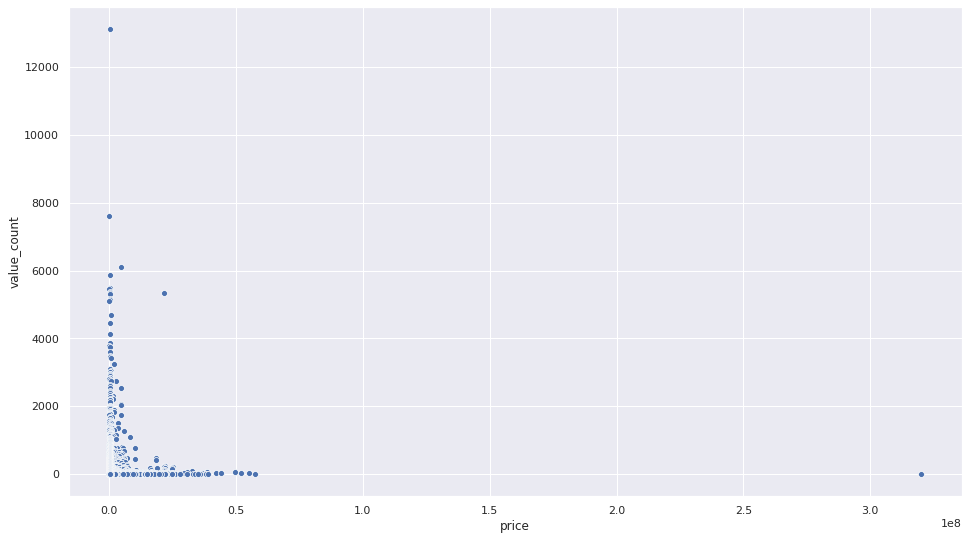

In [297]:
plt.figure(figsize=(16, 9))
sns.despine(top=True, right=True)
sns.scatterplot(x=product_df['price'], y=product_df['value_count'])

Ahh. There some outliner there. Let's remove them 

In [298]:
product_df.describe()

,oldprice,price,product_id,status,value_count
count,8.614700e+04,8.614700e+04,8.972500e+04,89725.0,89725.000000
mean,3.496859e+05,3.496859e+05,2.592881e+06,200.0,21.456996
std,1.556639e+06,1.556639e+06,6.718197e+05,0.0,146.952468
min,9.000000e+03,9.000000e+03,1.478600e+04,200.0,1.000000
25%,1.200000e+05,1.200000e+05,2.273042e+06,200.0,2.000000
50%,2.000000e+05,2.000000e+05,2.793236e+06,200.0,4.000000
75%,3.200000e+05,3.200000e+05,3.082387e+06,200.0,11.000000
max,3.200000e+08,3.200000e+08,3.414655e+06,200.0,13112.000000


- 25% 120k
- 50% 200k - Median
- 75% 320k
- Mean: 349k
- Mean > Median: **positive skew**: The right tail is longer; the mass of the distribution is concentrated on the **left** of the figure. The distribution is said to be **right-skewed**

https://brownmath.com/stat/shape.htm

### Remove Outliners

In [301]:
outliner_stop_price = 350000 + 25*200000/100

In [302]:
price_df = product_df.dropna()

In [304]:
price_df.shape

(86147, 7)

In [306]:
price_df = price_df[price_df.price < outliner_stop_price]

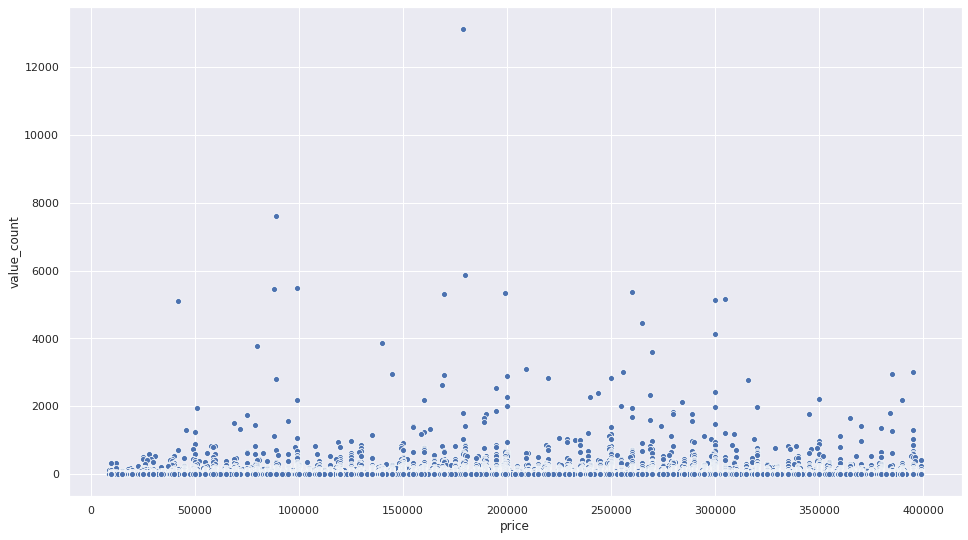

In [309]:
plt.figure(figsize=(16, 9))
sns.despine(top=True, right=True)
sns.scatterplot(x=price_df['price'], y=price_df['value_count'])

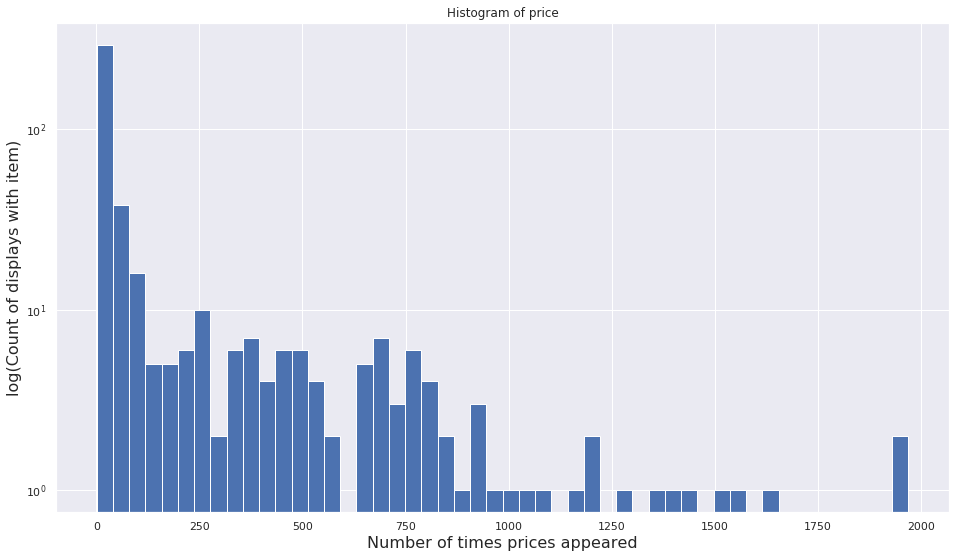

In [319]:
prices = price_df.price.value_counts()
sns.set()
plt.figure(figsize=(16, 9))
plt.hist(prices.values, bins=50, log=True)
plt.xlabel('Number of times prices appeared', fontsize=16)
plt.ylabel('log(Count of displays with item)', fontsize=16)
plt.title('Histogram of price')
plt.show()

In [314]:
prices = prices.to_frame()

In [316]:
prices.reset_index()

,index,price
0,150000.0,1970
1,250000.0,1949
2,99000.0,1623
3,350000.0,1564
4,120000.0,1523
5,180000.0,1446
6,200000.0,1409
7,300000.0,1365
8,220000.0,1272
9,280000.0,1197


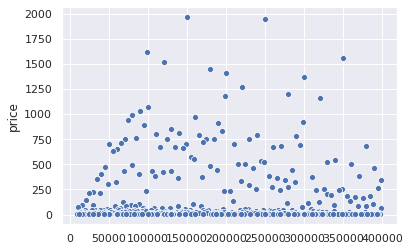

In [318]:
sns.scatterplot(x=prices.index, y=prices.price)

In [75]:
event_df.to_csv(r'./event_update.csv', index=None)